In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
data = tf.keras.datasets.mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = data.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

In [ ]:
x_train_normalized[0][20]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.09411765, 0.44705882, 0.86666667, 0.99215686, 0.99215686,
       0.99215686, 0.99215686, 0.78823529, 0.30588235, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [ ]:
model = tf.keras.models.Sequential(
    [
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
    ],
    name = "model"
)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train_normalized, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2426 - accuracy: 0.9290
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1022 - accuracy: 0.9685
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0719 - accuracy: 0.9776
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0538 - accuracy: 0.9831
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0439 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0361 - accuracy: 0.9881
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0280 - accuracy: 0.9909
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0264 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0229 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.018

In [ ]:
score = model.evaluate(x_test_normalized, y_test)
print(score)

313/313 [==============================] - 1s 2ms/step - loss: 0.0884 - accuracy: 0.9795
[0.08844030648469925, 0.9794999957084656]


In [ ]:
pred = model.predict(x_test_normalized)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(pred)

[[2.11987898e-13 9.27627766e-12 5.56482527e-10 ... 9.99999940e-01
  6.00875859e-12 2.46173915e-10]
 [5.08074655e-14 3.78733746e-11 9.99999940e-01 ... 1.84700646e-17
  6.59575259e-13 9.81148654e-23]
 [5.95419252e-08 9.99969542e-01 1.09607555e-07 ... 1.11722920e-05
  2.10476014e-06 6.24823748e-09]
 ...
 [7.26224592e-22 1.19488676e-14 1.39435217e-26 ... 9.27404312e-13
  2.33616372e-16 8.07345232e-11]
 [8.68212890e-10 1.36830685e-14 5.80575334e-16 ... 6.06805092e-11
  9.97380880e-08 8.08248257e-14]
 [2.22665185e-11 8.02318078e-14 1.01136229e-13 ... 9.02459260e-18
  4.02209461e-13 2.72416596e-16]]


In [ ]:
print(np.argmax(pred[0]))

7


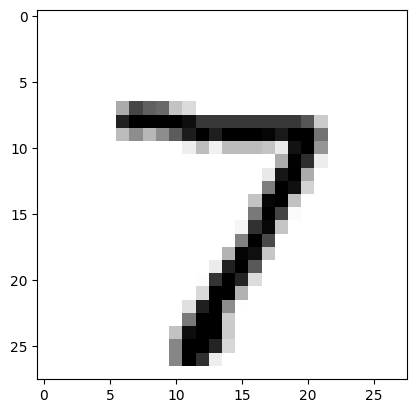

In [ ]:
plt.imshow(x_test_normalized[0], cmap=plt.cm.binary)
plt.show()

In [ ]:
x_test_normalized[0][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
model.save('model3')

In [ ]:
## Test model
model3 = tf.keras.models.load_model('model3')

In [ ]:
image_path = 'sebi_2.png'

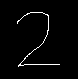

In [ ]:
image = Image.open(image_path).convert('L') #convert to greyscale
image

In [ ]:
image = image.resize((28, 28))
image

In [ ]:
image_array = np.array(image) / 255.0
#image_array = 1 - image_array

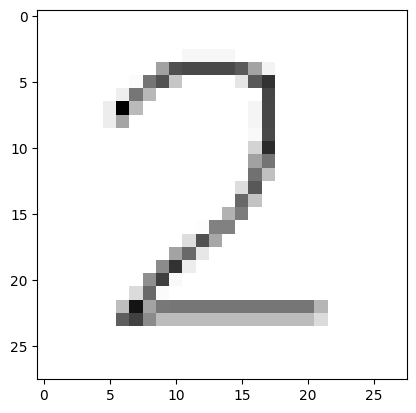

In [ ]:
plt.imshow(image_array, cmap=plt.cm.binary)
plt.show()

In [ ]:
image_input = image_array.reshape(1, 28, 28).astype('float32')

In [ ]:
p = model3.predict(image_input)

1/1 [==============================] - 0s 23ms/step


In [ ]:
image

In [ ]:
print(np.argmax(p))

2


In [ ]:
print(p)

[[2.17424170e-03 1.36518143e-02 9.69051600e-01 6.89024106e-03
  1.14857117e-04 1.17874017e-03 3.22483771e-04 1.57393643e-03
  4.93950956e-03 1.02500715e-04]]


In [ ]:
# Conclusions:
# The model performs very well on the dataset, but poorly on my own handwritten digits.
# More preprocessing steps may be required in order to make to model more general in predicting the handwritting.